In [1]:
# 示例代码中或有不当之处，欢迎读者提出改进，作者邮箱tohuangjia@gmail.com
import numpy as np # 导入NumPy数学工具箱
import pandas as pd # 导入Pandas数据处理工具箱
# 读入数据并显示前面几行的内容，这是为了确保我们的文件读入的正确性
# 示例代码是在Kaggle中数据集中读入文件，如果在本机中需要指定具体本地路径
df_ads = pd.read_csv('../input/advertising-simple-dataset/advertising.csv')
df_ads.head()

,wechat,weibo,others,sales
0,304.4,93.6,294.4,9.7
1,1011.9,34.4,398.4,16.7
2,1091.1,32.8,295.2,17.3
3,85.5,173.6,403.2,7.0
4,1047.0,302.4,553.6,22.1


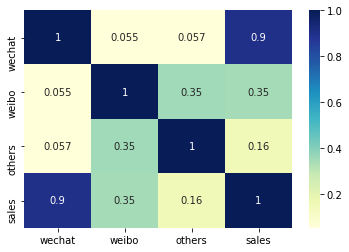

In [2]:
#导入数据可视化所需要的库
import matplotlib.pyplot as plt #Matplotlib – Python画图工具库
import seaborn as sns #Seaborn – 统计学数据可视化工具库
# 对所有的标签和特征两两显示其相关性热力图(heatmap)
sns.heatmap(df_ads.corr(), cmap="YlGnBu", annot = True)
plt.show() # plt代表英文plot,就是画图的意思

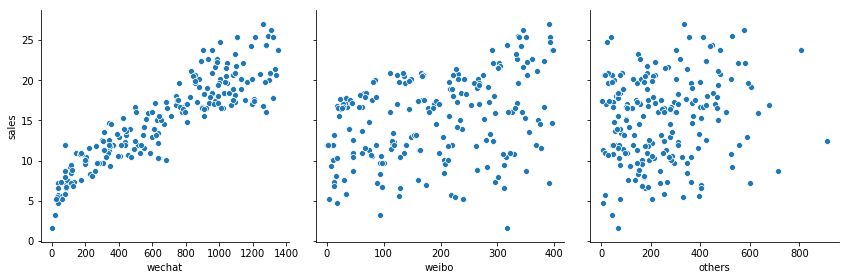

In [3]:
# 显示销量和各种广告投放量的散点图
sns.pairplot(df_ads, x_vars=['wechat', 'weibo', 'others'], 
                          y_vars='sales', 
                          height=4, aspect=1, kind='scatter')
plt.show()

In [4]:
X = np.array(df_ads.wechat) #构建特征集，只有微信广告一个特征
y = np.array(df_ads.sales) #构建标签集，销售金额
print ("张量X的阶:",X.ndim)
print ("张量X的形状:", X.shape)
print ("张量X的内容:", X)

张量X的阶: 1
张量X的形状: (200,)
张量X的内容: [ 304.4 1011.9 1091.1   85.5 1047.   940.9 1277.2   38.2  342.6  347.6
  980.1   39.1   39.6  889.1  633.8  527.8  203.4  499.6  633.4  437.7
  334.  1132.   841.3  435.4  627.4  599.2  321.2  571.9  758.9  799.4
  314.   108.3  339.9  619.7  227.5  347.2  774.4 1003.3   60.1   88.3
 1280.4  743.9  805.4  905.    76.9 1088.8  670.2  513.7 1067.    89.2
  130.1  113.8  195.7 1000.1  283.5 1245.3  681.1  341.7  743.   976.9
 1308.6  953.7 1196.2  488.7 1027.4  830.8  984.6  143.3 1092.5  993.7
 1290.4  638.4  355.8  854.5    3.2  615.2   53.2  401.8 1348.6   78.3
 1188.9 1206.7  899.1  364.9  854.9 1099.7  909.1 1293.6  311.2  411.3
  881.3 1091.5   18.7  921.4 1214.4 1038.8  427.2  116.5  879.1  971.
  899.1  114.2   78.3   59.6  748.5  681.6  261.6 1083.8 1322.7  753.5
 1259.9 1080.2   33.2  909.1 1092.5 1208.5  766.2  467.3  611.1  202.5
   24.6  442.3 1301.3  314.9  634.7  408.1  560.1  503.7 1154.8 1130.2
  932.8  958.7 1044.2 1274.9  550.6 1259.   19

In [5]:
# X = X.reshape((len(X),1)) #通过reshape函数把向量转换为矩阵，len函数返回样本个数
# y = y.reshape((len(y),1)) #通过reshape函数把向量转换为矩阵，len函数返回样本个数
X = X.reshape(-1,1) #通过reshape函数把向量转换为矩阵，len函数返回样本个数
y = y.reshape(-1,1) #通过reshape函数把向量转换为矩阵，len函数返回样本个数
print ("张量X的阶:",X.ndim)
print ("张量X的形状:", X.shape)

张量X的阶: 2
张量X的形状: (200, 1)


In [6]:
# 将数据集进行80%（训练集）和20%（验证集）的分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                   test_size=0.2, random_state=0)

In [7]:
def scaler(train, test): # 定义归一化函数 ，进行数据压缩    
    min = train.min(axis=0) # 训练集最小值
    max = train.max(axis=0) # 训练集最大值
    gap = max - min # 最大值和最小值的差
    train -= min # 所有数据减最小值
    train /= gap # 所有数据除以大小值差
    test -= min #把训练集最小值应用于测试集
    test /= gap #把训练集大小值差应用于测试集
    return train, test # 返回压缩后的数据

In [8]:
X_train,X_test = scaler(X_train,X_test) # 对特征归一化
y_train,y_test = scaler(y_train,y_test) # 对标签也归一化

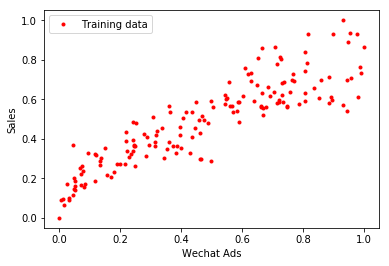

In [9]:
# lineX = np.linspace(X_norm.min(), X_norm.max(),100)
#用之前已经导入的matplotlib.pyplot中的plot方法显示散点图
plt.plot(X_train,y_train,'r.', label='Training data') 
plt.xlabel('Wechat Ads') # x轴Label
plt.ylabel('Sales') # y轴Label
plt.legend() # 显示图例
plt.show() # 显示绘图结果

In [10]:
# 定义线性回归的损失函数
def cost_function(X, y, w, b): # 手工定义一个MSE均方误差函数
    y_hat = w*X + b # 这是假设函数,其中已经应用了Python的广播功能
    loss = y_hat-y # 求出每一个y’和训练集中真实的y之间的差异 
    cost = np.sum(loss**2)/len(X) # 这是均方误差函数的代码实现
    return cost # 返回当前模型的均方误差值

In [11]:
print ("当权重5，偏置3时，损失为：", cost_function(X_train, y_train, w=5, b=3))
print ("当权重100，偏置1时，损失为：", cost_function(X_train, y_train, w=100, b=1))

当权重5，偏置3时，损失为： 25.592781941560116
当权重100，偏置1时，损失为： 3155.918523006111


In [12]:
# 线性回归的梯度下降实现
def gradient_descent(X, y, w, b, lr, iter): # 定义一个实现梯度下降的函数
    l_history = np.zeros(iterations) # 初始化记录梯度下降过程中损失的数组
    w_history = np.zeros(iterations) # 初始化记录梯度下降过程中权重的数组
    b_history = np.zeros(iterations) # 初始化记录梯度下降过程中偏置的数组                      
    for iter in range(iterations): # 进行梯度下降的迭代，就是下多少级台阶
        y_hat  = w*X + b # 这个是向量化运行实现的假设函数
        loss = y_hat-y # 这是中间过程,求得的是假设函数预测的y和真正的y值之间的差值
        derivative_weight = X.T.dot(loss)/len(X)*2 # 对权重求导，len(X)就是数据集样本数N
        derivative_bias = sum(loss)*1/len(X)*2 # 对偏置求导，len(X)就是数据集样本数N
        w = w - lr*derivative_weight # 结合下降速率alpha更新权重
        b = b - lr*derivative_bias # 结合下降速率alpha更新偏置
        l_history[iter] = cost_function(X, y, w,b) # 梯度下降过程中损失的历史 
        w_history[iter] = w # 梯度下降过程中权重的历史
        b_history[iter] = b # 梯度下降过程中偏置的历史
    return l_history, w_history, b_history # 返回梯度下降过程数据

In [13]:
# 定义线性回归的预测函数
def predict(weight,bias,X): # 定义预测函数
    y_hat = weight*X + bias # 这是假设函数,其中已经应用了Python的广播功能
    return y_hat # 返回预测分类的结果

In [14]:
# 定义线性回归模型 - 核心就是调用梯度下降
def linear_regression(X, y, weight, bias, alpha, iterations): 
    loss_history, weight_history, bias_history = gradient_descent(X, y, 
                                                                  weight, bias, 
                                                                  alpha, iterations)
    print("训练最终损失:", loss_history[-1]) # 打印最终损失
    y_pred = predict(weight_history[-1],bias_history[-1],X) # 预测
    traning_acc = 100 - np.mean(np.abs(y_pred - y))*100 # 计算准确率
    print("线性回归训练准确率: {:.2f}%".format(traning_acc))  # 打印准确率
    return loss_history, weight_history, bias_history # 返回训练历史记录

In [15]:
# 首先确定参数的初始值
iterations = 500; # 迭代1500次
alpha = 0.5; #学习速率设为1,0.5和0.01，分别试一下
weight = -5 # 权重
bias = 3 # 偏置
# 计算一下初始权重和偏置值所带来的损失
print ('当前损失：',cost_function(X_train, y_train, weight, bias))

当前损失： 2.687591069813268


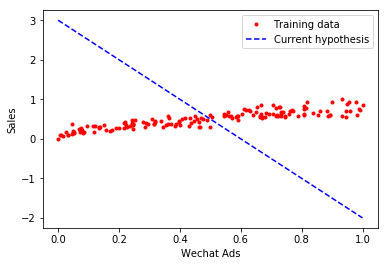

In [16]:
# 绘制当前的函数模型
plt.plot(X_train, y_train,'r.', label='Training data') # 显示训练集散点图
line_X = np.linspace(X_train.min(), X_train.max(), 500) # X值域
line_y = [weight*xx + bias for xx in line_X] # 假设函数y_hat
plt.plot(line_X,line_y,'b--', label='Current hypothesis' ) # 显示当前拟合函数
plt.xlabel('Wechat Ads') # x轴Label
plt.ylabel('Sales') # y轴Label
plt.legend() # 显示图例
plt.show() # 显示绘图

In [17]:
# 用线性回归模型训练机器，拟合函数
loss_history, weight_history, bias_history = \
   linear_regression(X_train,y_train,weight,bias,alpha,iterations)

训练最终损失: 0.009312952135151986
线性回归训练准确率: 92.28%


In [18]:
# 根据初始参数值，进行梯度下降，也就是开始训练机器，拟合函数
loss_history, weight_history, bias_history = \
   gradient_descent(X_train, y_train, weight, bias, alpha, iterations)

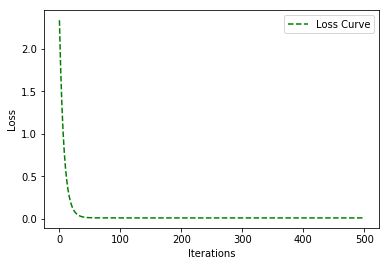

In [19]:
plt.plot(loss_history,'g--',label='Loss Curve')
plt.xlabel('Iterations') # x轴Label
plt.ylabel('Loss') # y轴Label
plt.legend() # 显示图例
plt.show() # 显示损失曲线

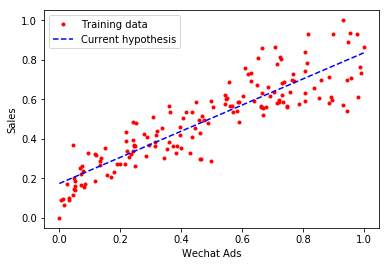

In [20]:
# 绘制当前的函数模型
plt.plot(X_train, y_train,'r.', label='Training data') # 显示训练集散点图
line_X = np.linspace(X_train.min(), X_train.max(), 500) # X值域
# 关于weight_history[-1],这里的索引[-1]，我们讲过，就代表迭代500次后的最后一个W值
line_y = [weight_history[-1]*xx + bias_history[-1] for xx in line_X] # 假设函数y_hat
plt.plot(line_X,line_y,'b--', label='Current hypothesis' ) # 显示当前拟合函数
plt.xlabel('Wechat Ads') # x轴Label
plt.ylabel('Sales') # y轴Label
plt.legend() # 显示图例
plt.show() # 显示绘图

In [21]:
print ('当前损失：',cost_function(X_train, y_train, weight_history[-1], bias_history[-1]))
print ('当前权重：',weight_history[-1])
print ('当前偏置：',bias_history[-1])

当前损失： 0.009312952135151986
当前权重： 0.6608381748731955
当前偏置： 0.17402747570052432


In [22]:
print ('测试集损失：',cost_function(X_test, y_test, weight_history[-1], bias_history[-1]))

测试集损失： 0.009068113079114393


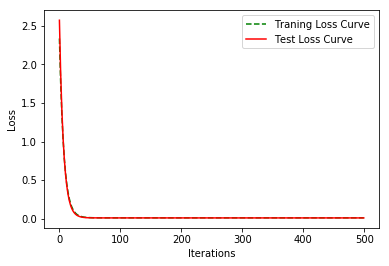

In [23]:
# 同时绘制训练集和测试集损失曲线
loss_test ,a , b = gradient_descent(X_test, y_test, weight, bias, alpha, iterations)
plt.plot(loss_history,'g--',label='Traning Loss Curve')
plt.plot(loss_test,'r',label='Test Loss Curve')
plt.xlabel('Iterations') # x轴Label
plt.ylabel('Loss') # y轴Label
plt.legend() # 显示图例
plt.show()

In [24]:
# 设计Contour Plot动画
import matplotlib.animation as animation

theta0_vals = np.linspace(-2, 3, 100)
theta1_vals = np.linspace(-3, 3, 100)
J_vals = np.zeros((theta0_vals.size, theta1_vals.size))

for t1, element in enumerate(theta0_vals):
    for t2, element2 in enumerate(theta1_vals):
        thetaT = np.zeros(shape=(2, 1))
        weight = element
        bias = element2
        J_vals[t1, t2] = cost_function(X_train, y_train, weight, bias)

J_vals = J_vals.T
A, B = np.meshgrid(theta0_vals, theta1_vals)
C = J_vals

fig = plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(X_train,y_train,'ro', label='Training data')
plt.title('Sales Prediction')
plt.axis([X_train.min()-X_train.std(),X_train.max()+X_train.std(),y_train.min()-y_train.std(),y_train.max()+y_train.std()])
plt.grid(axis='both')
plt.xlabel("WeChat Ads Volumn (X1) ")
plt.ylabel("Sales Volumn (Y)")
plt.legend(loc='lower right')

line, = plt.plot([], [], 'b-', label='Current Hypothesis')
annotation = plt.text(-2, 3,'',fontsize=20,color='green')
annotation.set_animated(True)

plt.subplot(122)
cp = plt.contourf(A, B, C)
plt.colorbar(cp)
plt.title('Filled Contours Plot')
plt.xlabel('Bias')
plt.ylabel('Weight')
track, = plt.plot([], [], 'r-')
point, = plt.plot([], [], 'ro')

plt.tight_layout()
plt.close()

def init():
    line.set_data([], [])
    track.set_data([], [])
    point.set_data([], [])
    annotation.set_text('')
    return line, track, point, annotation

def animate(i):
    fit1_X = np.linspace(X_train.min()-X_train.std(), X_train.max()+X_train.std(), 1000)
    fit1_y = bias_history[i] + weight_history[i]*fit1_X
    
    fit2_X = bias_history.T[:i]
    fit2_y = weight_history.T[:i]
    
    track.set_data(fit2_X, fit2_y)
    line.set_data(fit1_X, fit1_y)
    point.set_data(bias_history.T[i], weight_history.T[i])
    
    annotation.set_text('Cost = %.4f' %(loss_history[i]))
    return line, track, point, annotation

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=0, blit=True)

anim.save('animation.gif', writer='imagemagick', fps = 500)


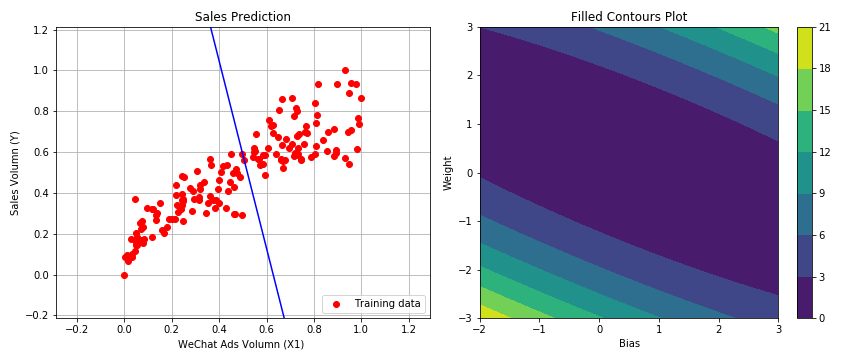

In [25]:
# 显示Contour Plot动画
import io
import base64
from IPython.display import HTML

filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))